The notebooks can downloaded from: https://github.com/muf148/Quantum-Machine-Learning-with-Qiskit-2.x/tree/main (Links to an external site.)

Qs. 1. For the data generated in notebook QML3a (not QML3b), design a parametrized circuit by using a choice of your own encoding scheme. You should aim for a classification accuracy on the training and test data set of up to 90%. [10 points]

Qs. 2. Design an ansatz and choose a data encoding scheme of your choice for the QVC circuit and aim for a training & test accuracy of more than 85% using 20 features of the Leukemia data. [10 points]

Qs. 3. Experiment with different feature encodings for the Leukemia data with 20 features and implement the QSVM. Aim to get a training and test accuracy of more than 85%. [10 points]

### Qs. 1. For the data generated in notebook QML3a (not QML3b), design a parametrized circuit by using a choice of your own encoding scheme. You should aim for a classification accuracy on the training and test data set of up to 90%. [10 points]

### QML 3a.  Variational Quantum Classifier (VQCs) or Quantum Neural Networks (QNNs)


If you are running this notebook in VS code, your environment must have the following libraries installed. If you are running this in google colab, you need to install the following libraries each time you initialize colab session.

`qiskit, qiskit-aer, qiskit-ibm-runtime, matplotlib, pylatexenc, pandas, scikit-learn`

In [1]:
!uv pip install qiskit qiskit-aer qiskit-ibm-runtime matplotlib pylatexenc pandas scikit-learn
#!pip install qiskit qiskit-aer qiskit-ibm-runtime matplotlib pylatexenc pandas scikit-learn

Using Python 3.12.12 environment at: /usr
Audited 7 packages in 100ms


### 1. Dataset
Let us create a toy data set with one feature and labels 1 or -1 randomaly and vizualize it

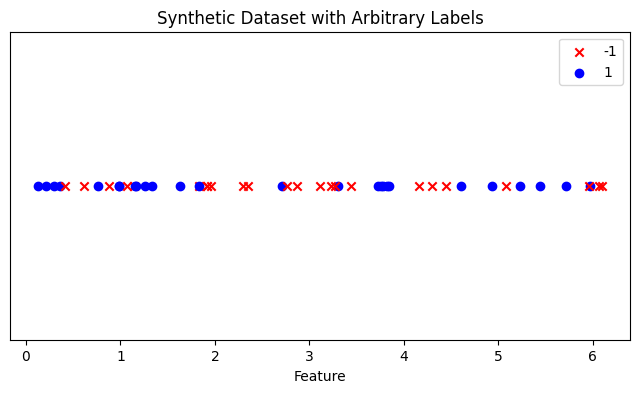

In [2]:
# Assign arbitrary labels (-1 or 1) randomly to each sample
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(50) * 2*np.pi  # 20 random samples in range [0, 10]
y_arbitrary = np.random.choice([-1, 1], size=X.shape)

# Plot with arbitrary labels
plt.figure(figsize=(8, 4))
for xi, yi in zip(X, y_arbitrary):
    if yi == 1:
        plt.scatter(xi, 0, marker='o', color='blue', label='1' if '1' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(xi, 0, marker='x', color='red', label='-1' if '-1' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.xlabel('Feature')
plt.yticks([])
plt.legend()
plt.title('Synthetic Dataset with Arbitrary Labels')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y_arbitrary, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_arbitrary, test_size=0.2, random_state=42)

In [4]:
test_size = np.shape(X_test)[0]
train_size = np.shape(X_train)[0]
print('test size:', test_size, ', train size:', train_size)

test size: 10 , train size: 40


### 2. U(x,$\theta$)
Let us create a simple variational circuit for data input and with a weight parameter

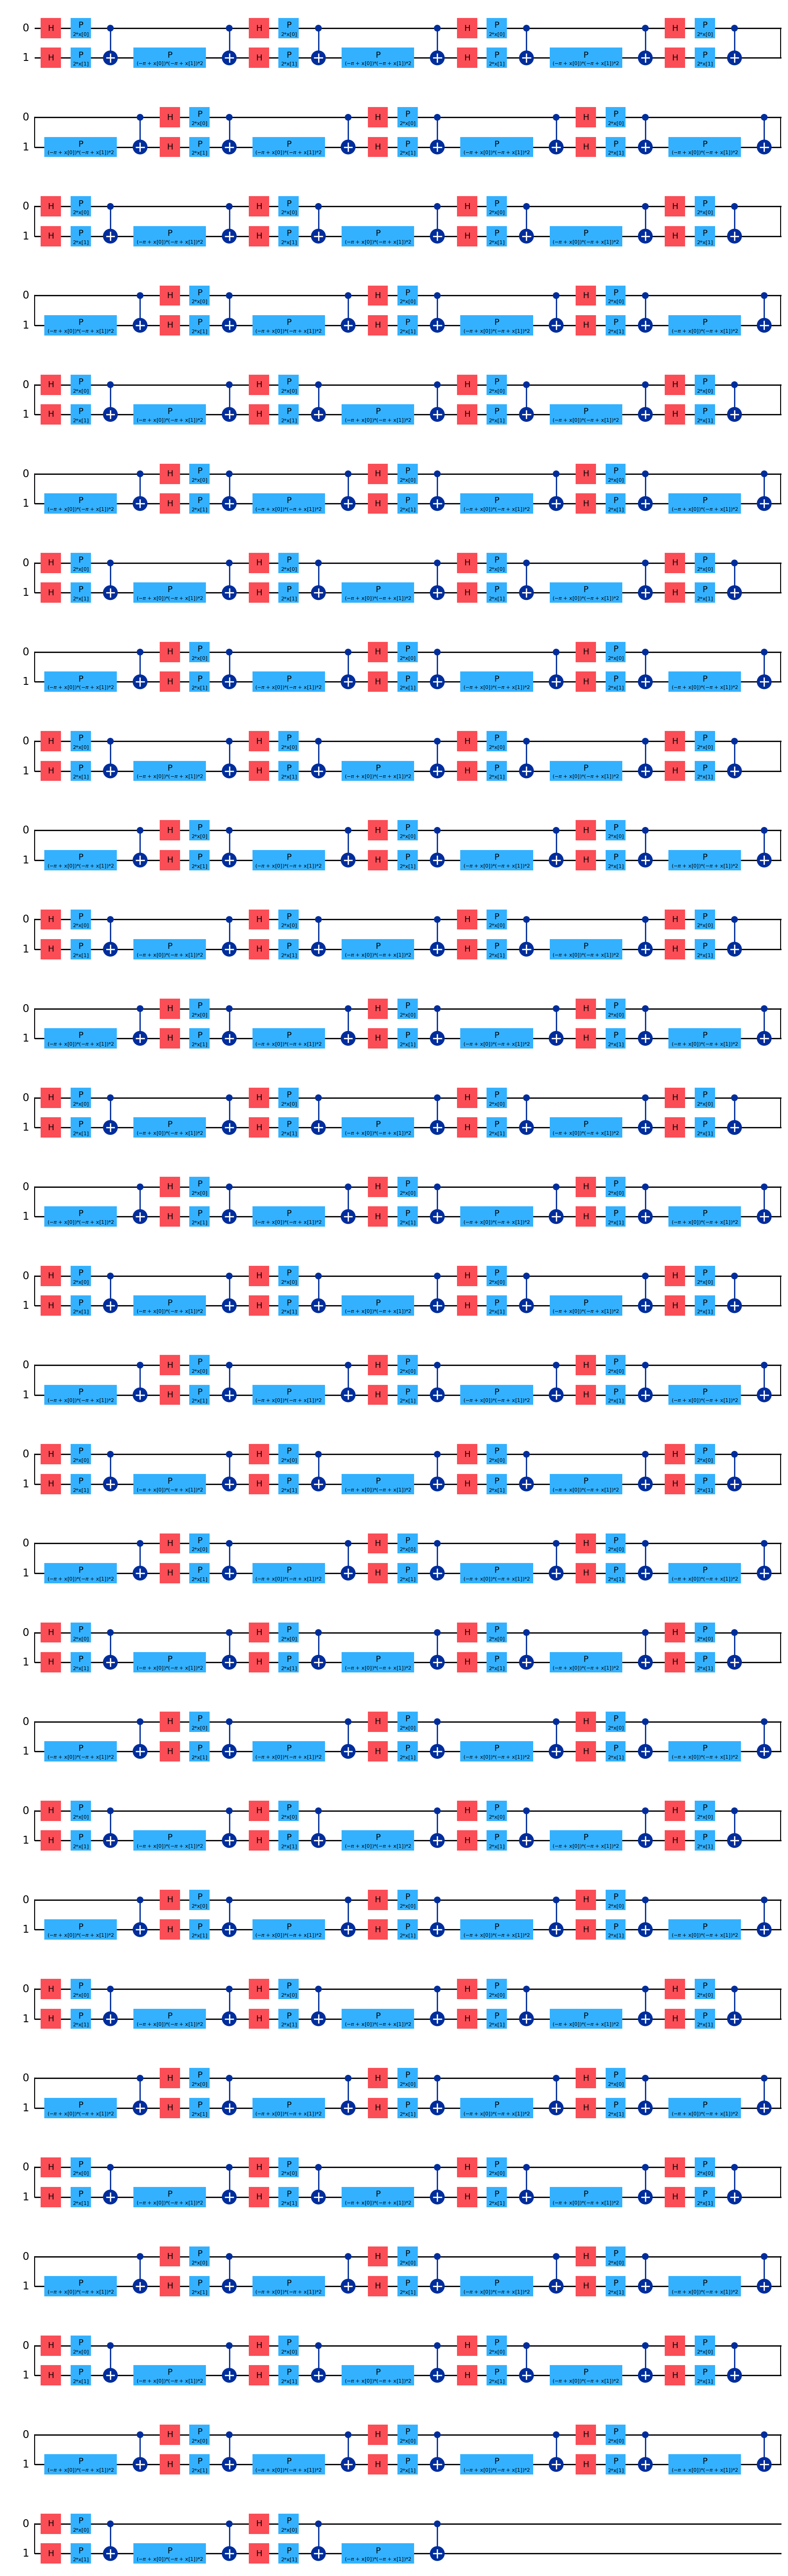

In [5]:
"""from qiskit.circuit import Parameter, QuantumCircuit

circuit = QuantumCircuit(1)
x = Parameter('x')
theta = Parameter('θ')
circuit.rx(x, 0)
circuit.ry(theta, 0)
circuit.h(0)


circuit.draw('mpl')"""


from qiskit.circuit import Parameter, QuantumCircuit
"""
circuit = QuantumCircuit(2)
x = Parameter('x')
theta = Parameter('θ')
circuit.rx(x, 0)
circuit.ry(theta, 0)
circuit.h(0)

circuit.rx(x, 1)
circuit.ry(theta, 1)
circuit.h(1)


circuit.rx(x, 0)
circuit.ry(theta, 0)
circuit.rx(x, 1)
circuit.ry(theta, 1)
circuit.cx(0,1)

circuit.rx(x, 0)
circuit.ry(theta, 0)

circuit.rx(x, 1)
circuit.ry(theta, 1)
circuit.cx(0,1)


circuit.y(0)
circuit.z(1)

circuit.x(0)

circuit.draw('mpl')"""

from qiskit.circuit.library import zz_feature_map, pauli_feature_map

#circuit = pauli_feature_map(feature_dimension=2, reps=10, parameter_prefix="x", paulis=["Z", "YY"], entanglement="full")
circuit = zz_feature_map(feature_dimension=2, reps=100,parameter_prefix="x", entanglement="full")
# for circuit = zz_feature_map(feature_dimension=2, reps=100,parameter_prefix="x", entanglement="full") we obtain:
# Train accuracy: 65.0% , Test accuracy: 70.0%


circuit.draw('mpl')

In [6]:
# Train accuracy and Test accuracy

# for circuit = zz_feature_map(feature_dimension=2, reps=100,parameter_prefix="x", entanglement="full") we obtain:
# Train accuracy: 65.0% , Test accuracy: 70.0%


# for circuit = QuantumCircuit(2) x = Parameter('x') theta = Parameter('θ') circuit.rx(x, 0) .ry(theta, 0) .h(0)
# .rx(x, 1) .ry(theta, 1) .h(1) .rx(x, 0) .ry(theta, 0) .rx(x, 1) .ry(theta, 1) .cx(0,1) .rx(x, 0)
# .ry(theta, 0) .rx(x, 1) .ry(theta, 1) .cx(0,1) .y(0) .z(1) .x(0) we obtain:
# Train accuracy: 60.0% , Test accuracy: 70.0%



# for circuit = QuantumCircuit(2) x = Parameter('x') theta = Parameter('θ') circuit.rx(x, 0) .ry(theta, 0) .h(0)
# .rx(x, 1) .ry(theta, 1) .h(1) .rx(x, 0) .ry(theta, 0) .rx(x, 1) .ry(theta, 1) .cx(0,1) .rx(x, 0)
# .ry(theta, 0) .rx(x, 1) .ry(theta, 1) .cx(0,1) we obtain:
# Train accuracy: 60.0% , Test accuracy: 70.0%


# for circuit = pauli_feature_map(feature_dimension=2, reps=10, parameter_prefix="x", paulis=["Z", "YY"], entanglement="full") we obtain:
# Train accuracy: 65.0% , Test accuracy: 60.0%





In [7]:
circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1])])

In [8]:
from qiskit.quantum_info import SparsePauliOp

#observable = SparsePauliOp.from_list([("Z", 1)]) # for 1 qubit
observable = SparsePauliOp.from_list([("ZZ", 1)]) # for 2 qubits
observable

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])

### 3. Define a function for forward pass
The function takes as input circuit, weight paramters and input data, estimator and observables and gives an array of expectation values as output

In [9]:
from qiskit.primitives import BaseEstimatorV2
from qiskit.quantum_info.operators.base_operator import BaseOperator
import numpy as np

def forward(circuit,input_params,weight_params,estimator,observable):
    num_samples = input_params.shape[0]
    weights0 = np.full_like(input_params, weight_params[0])
    params= [[inp, w0] for inp, w0 in zip(input_params, weights0)]
    pub = (circuit, observable, params)
    job = estimator.run([pub])
    result = job.result()[0]
    expectation_values = result.data.evs
    return expectation_values

let us choose a simple loss

In [10]:
def mse_loss(predict, target):
    return ((predict - target) ** 2).mean()


### 4. Define function to compute cost for given weight parameters

In [11]:
def mse_loss_weights(weight_params):
    predictions = forward(circuit=circuit,input_params=input_params,
        weight_params=weight_params,estimator=estimator,observable=observable)

    cost = mse_loss(predict=predictions, target=target)
    objective_func_vals.append(cost)

    global iter
    if iter % 10 == 0:
        print(f"Iter: {iter}, loss: {cost}")
    iter += 1

    return cost

### 5. Training
Use a chosen optimization routine

In [12]:
from qiskit.primitives import StatevectorEstimator as Estimator
from scipy.optimize import minimize
import numpy as np
num_epochs = 2
num_samples = len(X_train)

# Globals
circuit = circuit
estimator = Estimator()  # simulator for debugging
observables = observable
objective_func_vals = []
iter = 0

weight_params = np.random.rand() * 2 * np.pi

for epoch in range(num_epochs):
    print(f"Epoch: {epoch}")
    input_params = X_train
    target = y_train
    iter = 0
    res = minimize(
        mse_loss_weights, weight_params, method = "COBYLA", options={"maxiter": 100,'tol': 1e-8}
    )
    weight_params = res["x"]

Epoch: 0
Iter: 0, loss: 1.2580520577583851
Iter: 10, loss: 1.192470434949282
Iter: 20, loss: 0.8352587707560752
Iter: 30, loss: 0.8351240008731224
Iter: 40, loss: 0.8351233235121768
Epoch: 1
Iter: 0, loss: 0.8351233234721043
Iter: 10, loss: 1.0411692319729684
Iter: 20, loss: 0.8351253406724325
Iter: 30, loss: 0.8351233235034151


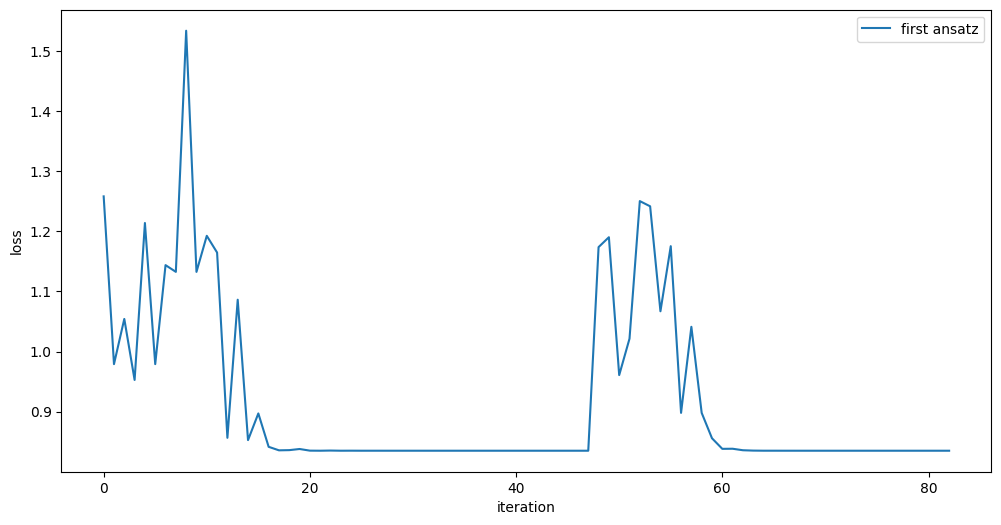

In [13]:
obj_func_vals_first = objective_func_vals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(obj_func_vals_first, label="first ansatz")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()
plt.show()

### 6. Training accuracy

In [14]:
import copy
from sklearn.metrics import accuracy_score
from qiskit.primitives import StatevectorEstimator as Estimator  # simulator
# from qiskit_ibm_runtime import EstimatorV2 as Estimator  # real quantum computer

estimator = Estimator()
# estimator = Estimator(backend=backend)

pred_train = forward(circuit, np.array(X_train), res["x"], estimator, observable)
# pred_train = forward(circuit_ibm, np.array(train_images), res['x'], estimator, observable_ibm)

print(pred_train)

pred_train_labels = copy.deepcopy(pred_train)
pred_train_labels[pred_train_labels >= 0] = 1
pred_train_labels[pred_train_labels < 0] = -1
print(pred_train_labels)
print(y_train)

accuracy = accuracy_score(y_train, pred_train_labels)
print(f"Train accuracy: {accuracy * 100}%")

[ 0.31374976  0.52054164  0.10164536  0.19091662 -0.20618352  0.30360258
 -0.49555666 -0.16908417 -0.56894518  0.38088825 -0.019095   -0.46766639
 -0.40457059 -0.175655    0.20236312 -0.29238696  0.94725229  0.67403615
 -0.5879902   0.53362321  0.27812594  0.24386558 -0.38998427 -0.20220076
  0.1270544   0.11130973 -0.10937327  0.26531343  0.38278537 -0.25126709
  0.9281215  -0.64494423 -0.27732261  0.7715161   0.65936917  0.84027758
  0.10882972 -0.02400927  0.55660743  0.10846695]
[ 1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.
 -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.
  1. -1.  1.  1.]
[ 1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1
 -1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1]
Train accuracy: 65.0%


### 7. Test accuracy

In [15]:
import copy
from sklearn.metrics import accuracy_score
from qiskit.primitives import StatevectorEstimator as Estimator  # simulator
# from qiskit_ibm_runtime import EstimatorV2 as Estimator  # real quantum computer

estimator = Estimator()
# estimator = Estimator(backend=backend)

pred_test = forward(circuit, np.array(X_test), res["x"], estimator, observable)
# pred_train = forward(circuit_ibm, np.array(train_images), res['x'], estimator, observable_ibm)

print(pred_test)

pred_test_labels = copy.deepcopy(pred_test)
pred_test_labels[pred_test_labels >= 0] = 1
pred_test_labels[pred_test_labels < 0] = -1
print(pred_test_labels)
print(y_test)

accuracy = accuracy_score(y_test, pred_test_labels)
print(f"Test accuracy: {accuracy * 100}%")

[ 0.83747747  0.74555815  0.15042296  0.52771927  0.61779498 -0.20562362
  0.38006342  0.51778426  0.28937015 -0.43535462]
[ 1.  1.  1.  1.  1. -1.  1.  1.  1. -1.]
[ 1 -1  1 -1  1 -1  1  1 -1 -1]
Test accuracy: 70.0%


### Qs. 2. Design an ansatz and choose a data encoding scheme of your choice for the QVC circuit and aim for a training & test accuracy of more than 85% using 20 features of the Leukemia data. [10 points]


### QML 3b.  Variational Quantum Classifier (VQCs) or Quantum Neural Networks (QNNs)


If you are running this notebook in VS code, your environment must have the following libraries installed. If you are running this in google colab, you need to install the following libraries each time you initialize colab session.

`qiskit, qiskit-aer, qiskit-ibm-runtime, matplotlib, pylatexenc, pandas, scikit-learn`

### 1. Data set. We will take Leukemia data set with 20 features
This dataset comes from the classic Golub et al. (1999) paper, where microarray gene expression data was used to distinguish Acute Myeloid Leukemia (AML) from Acute Lymphoblastic Leukemia (ALL).

Samples (n ≈ 72): Each column corresponds to one patient’s leukemia sample. There are 47 ALL samples and 25 AML samples. Each row corresponds to a gene (a probe on the microarray). The cell values are gene expression levels (typically log-transformed intensities). The data set can be downloaded from [this link](http://hastie.su.domains/CASI_files/DATA/leukemia_small.csv)

In [38]:
import pandas as pd
import numpy as np

# Load the CSV file
df_raw = pd.read_csv('leukemia_small.csv', header=None)

# Extract labels from the first row
labels = df_raw.iloc[0, :].values

# Extract data from rows 2 to 21 (index 1 to 20)
#X = df_raw.iloc[1:13, :].astype(float).values
# The 20 features of the Leukemia data
X = df_raw.iloc[1:21, :].astype(float).values
X = X.T
# Convert labels: ALL -> -1, AML -> 1
y = np.where(labels == 'ALL', -1, 1)

<Axes: >

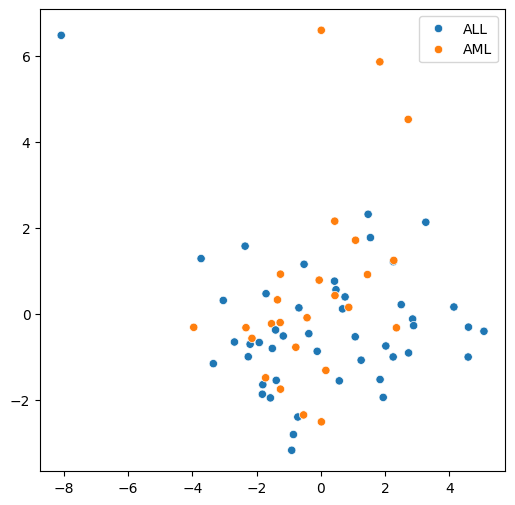

In [39]:
# We use the 20 features of the Leukemia data and after I apply PCA for dimensionality reduction
# We reduce the features at 12 components (or at 8 components or at x components) using PCA

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

X = PCA(n_components=12).fit_transform(X)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="tab10")

In [40]:
# Rescale X to be within -pi to pi
X_min = np.min(X)
X_max = np.max(X)
X_rescaled = (X - X_min) / (X_max - X_min) * (2 * np.pi) - np.pi
X = X_rescaled

In [41]:
X.shape, y.shape

((72, 12), (72,))

In [42]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
X_train.shape, X_test.shape, train_labels.shape, test_labels.shape

((57, 12), (15, 12), (57,), (15,))

In [44]:
X_train

array([[ 2.28593959e+00,  1.84152037e-01, -2.32472978e-01,
         5.21447912e-01,  6.20098912e-01,  2.29255769e-01,
         9.14633379e-02,  1.61224544e-01,  3.32707176e-01,
        -4.00303836e-02,  1.42678355e-01,  3.91811071e-01],
       [ 3.25794575e-01, -7.59434330e-01,  1.14717644e+00,
         8.62625363e-01,  6.61492851e-01,  5.50011968e-01,
         6.84172129e-01,  4.22692102e-01,  3.52009542e-01,
         7.07122347e-01,  1.66081856e-01,  3.95347977e-01],
       [-2.59464292e-01,  4.56242770e-01,  1.22088630e+00,
         1.43192252e-01,  1.26358750e-01, -3.94086327e-01,
         7.89768641e-01, -1.89708432e-01, -2.58666748e-01,
        -1.06217918e-01,  2.97904705e-01, -1.10341565e-01],
       [ 1.34576755e-01,  2.77806760e-01,  4.47375480e-01,
         3.82363502e-01,  8.08657154e-01,  2.86140921e-01,
         8.86844247e-01,  3.04764974e-01,  3.49888314e-01,
         5.10579928e-01,  3.35926988e-01,  3.78515517e-01],
       [-3.53791720e-01, -5.20827916e-01,  4.9649907

In [45]:
test_size = np.shape(X_test)[0]
train_size = np.shape(X_train)[0]
num_samples = np.shape(X_train)[0]

In [46]:
train_size, test_size

(57, 15)

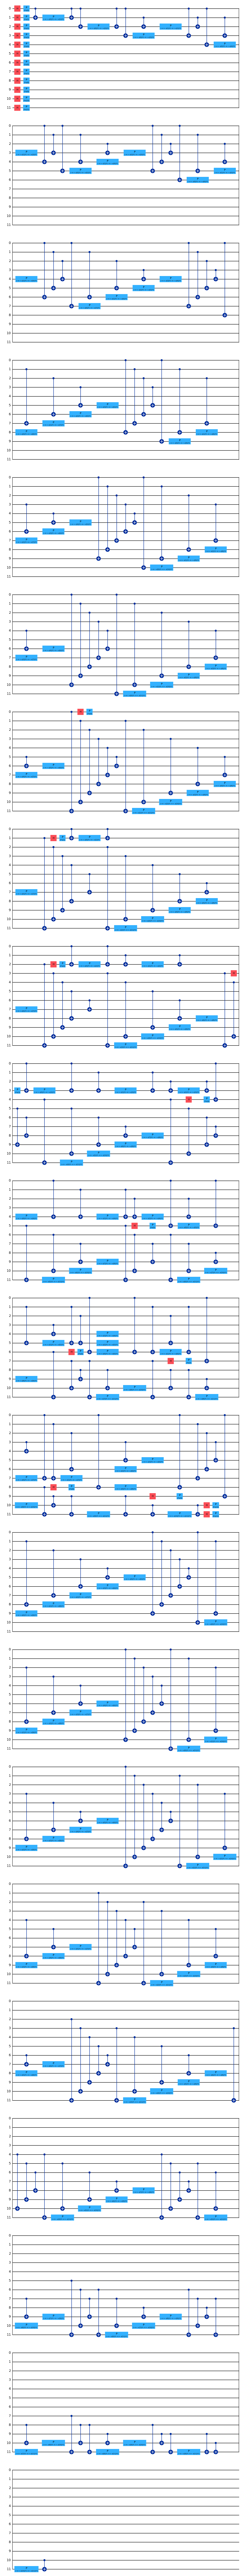

In [47]:
from qiskit.circuit.library import zz_feature_map, pauli_feature_map
from qiskit.circuit.library import efficient_su2
num_features = np.shape(X_train)[1]
num_qubits = int(num_features)
# Data encoding
# Note that qiskit orders parameters alphabetically. We assign the parameter prefix "a" to ensure our data encoding goes to the first part of the circuit, the feature mapping.
#feature_map = pauli_feature_map(num_qubits, reps=1, parameter_prefix="x", paulis=["Z", "YY"], entanglement="full")
#feature_map = zz_feature_map(num_qubits, reps=1,parameter_prefix="x")
feature_map = zz_feature_map(num_qubits, reps=2,parameter_prefix="x")
feature_map.draw("mpl")

Let us first try the ansatz below. We will return to revise it, later.


3
2+ qubit depth: 1


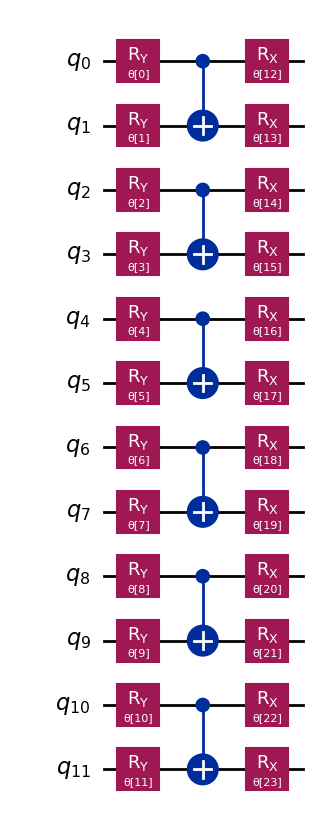

In [48]:
# Import the necessary packages
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

size = num_qubits
# Initialize the circuit using the same number of qubits as the image has pixels
qnn_circuit = QuantumCircuit(size)

# We choose to have two variational parameters for each qubit.
params = ParameterVector("θ", length=2 * size)

# A first variational layer:
for i in range(size):
    qnn_circuit.ry(params[i], i)

# Here is a list of qubit pairs between which we want CNOT gates. The choice of these is not yet obvious.
#qnn_cnot_list = [[0, 1],[2,3],[4,5],[6,7],[8,9],[10,11]]
qnn_cnot_list = [[0, 1],[2,3],[4,5],[6,7]]
qnn_cnot_list = [[0, 1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for i in range(len(qnn_cnot_list)):
    qnn_circuit.cx(qnn_cnot_list[i][0], qnn_cnot_list[i][1])

# The second variational layer:
for i in range(size):
    qnn_circuit.rx(params[size + i], i)

# Check the circuit depth, and the two-qubit gate depth
print(qnn_circuit.decompose().depth())
print(
    f"2+ qubit depth: {qnn_circuit.decompose().depth(lambda instr: len(instr.qubits) > 1)}"
)

# Draw the circuit
qnn_circuit.draw("mpl")

With the data encoding and variational circuit prepared, we can combine them to form our full ansatz. In this case, the components of our quantum circuit are quite analogous to those in neural networks, with $U(\vec{x})$ being most similar to the layer that loads input values from the image, and $W(\theta)$ being like the layer of variable "weights". Since this analogy holds in this case, we are adopting "qnn" in some of our naming conventions; but this analogy should not be limiting in your exploration of VQCs.



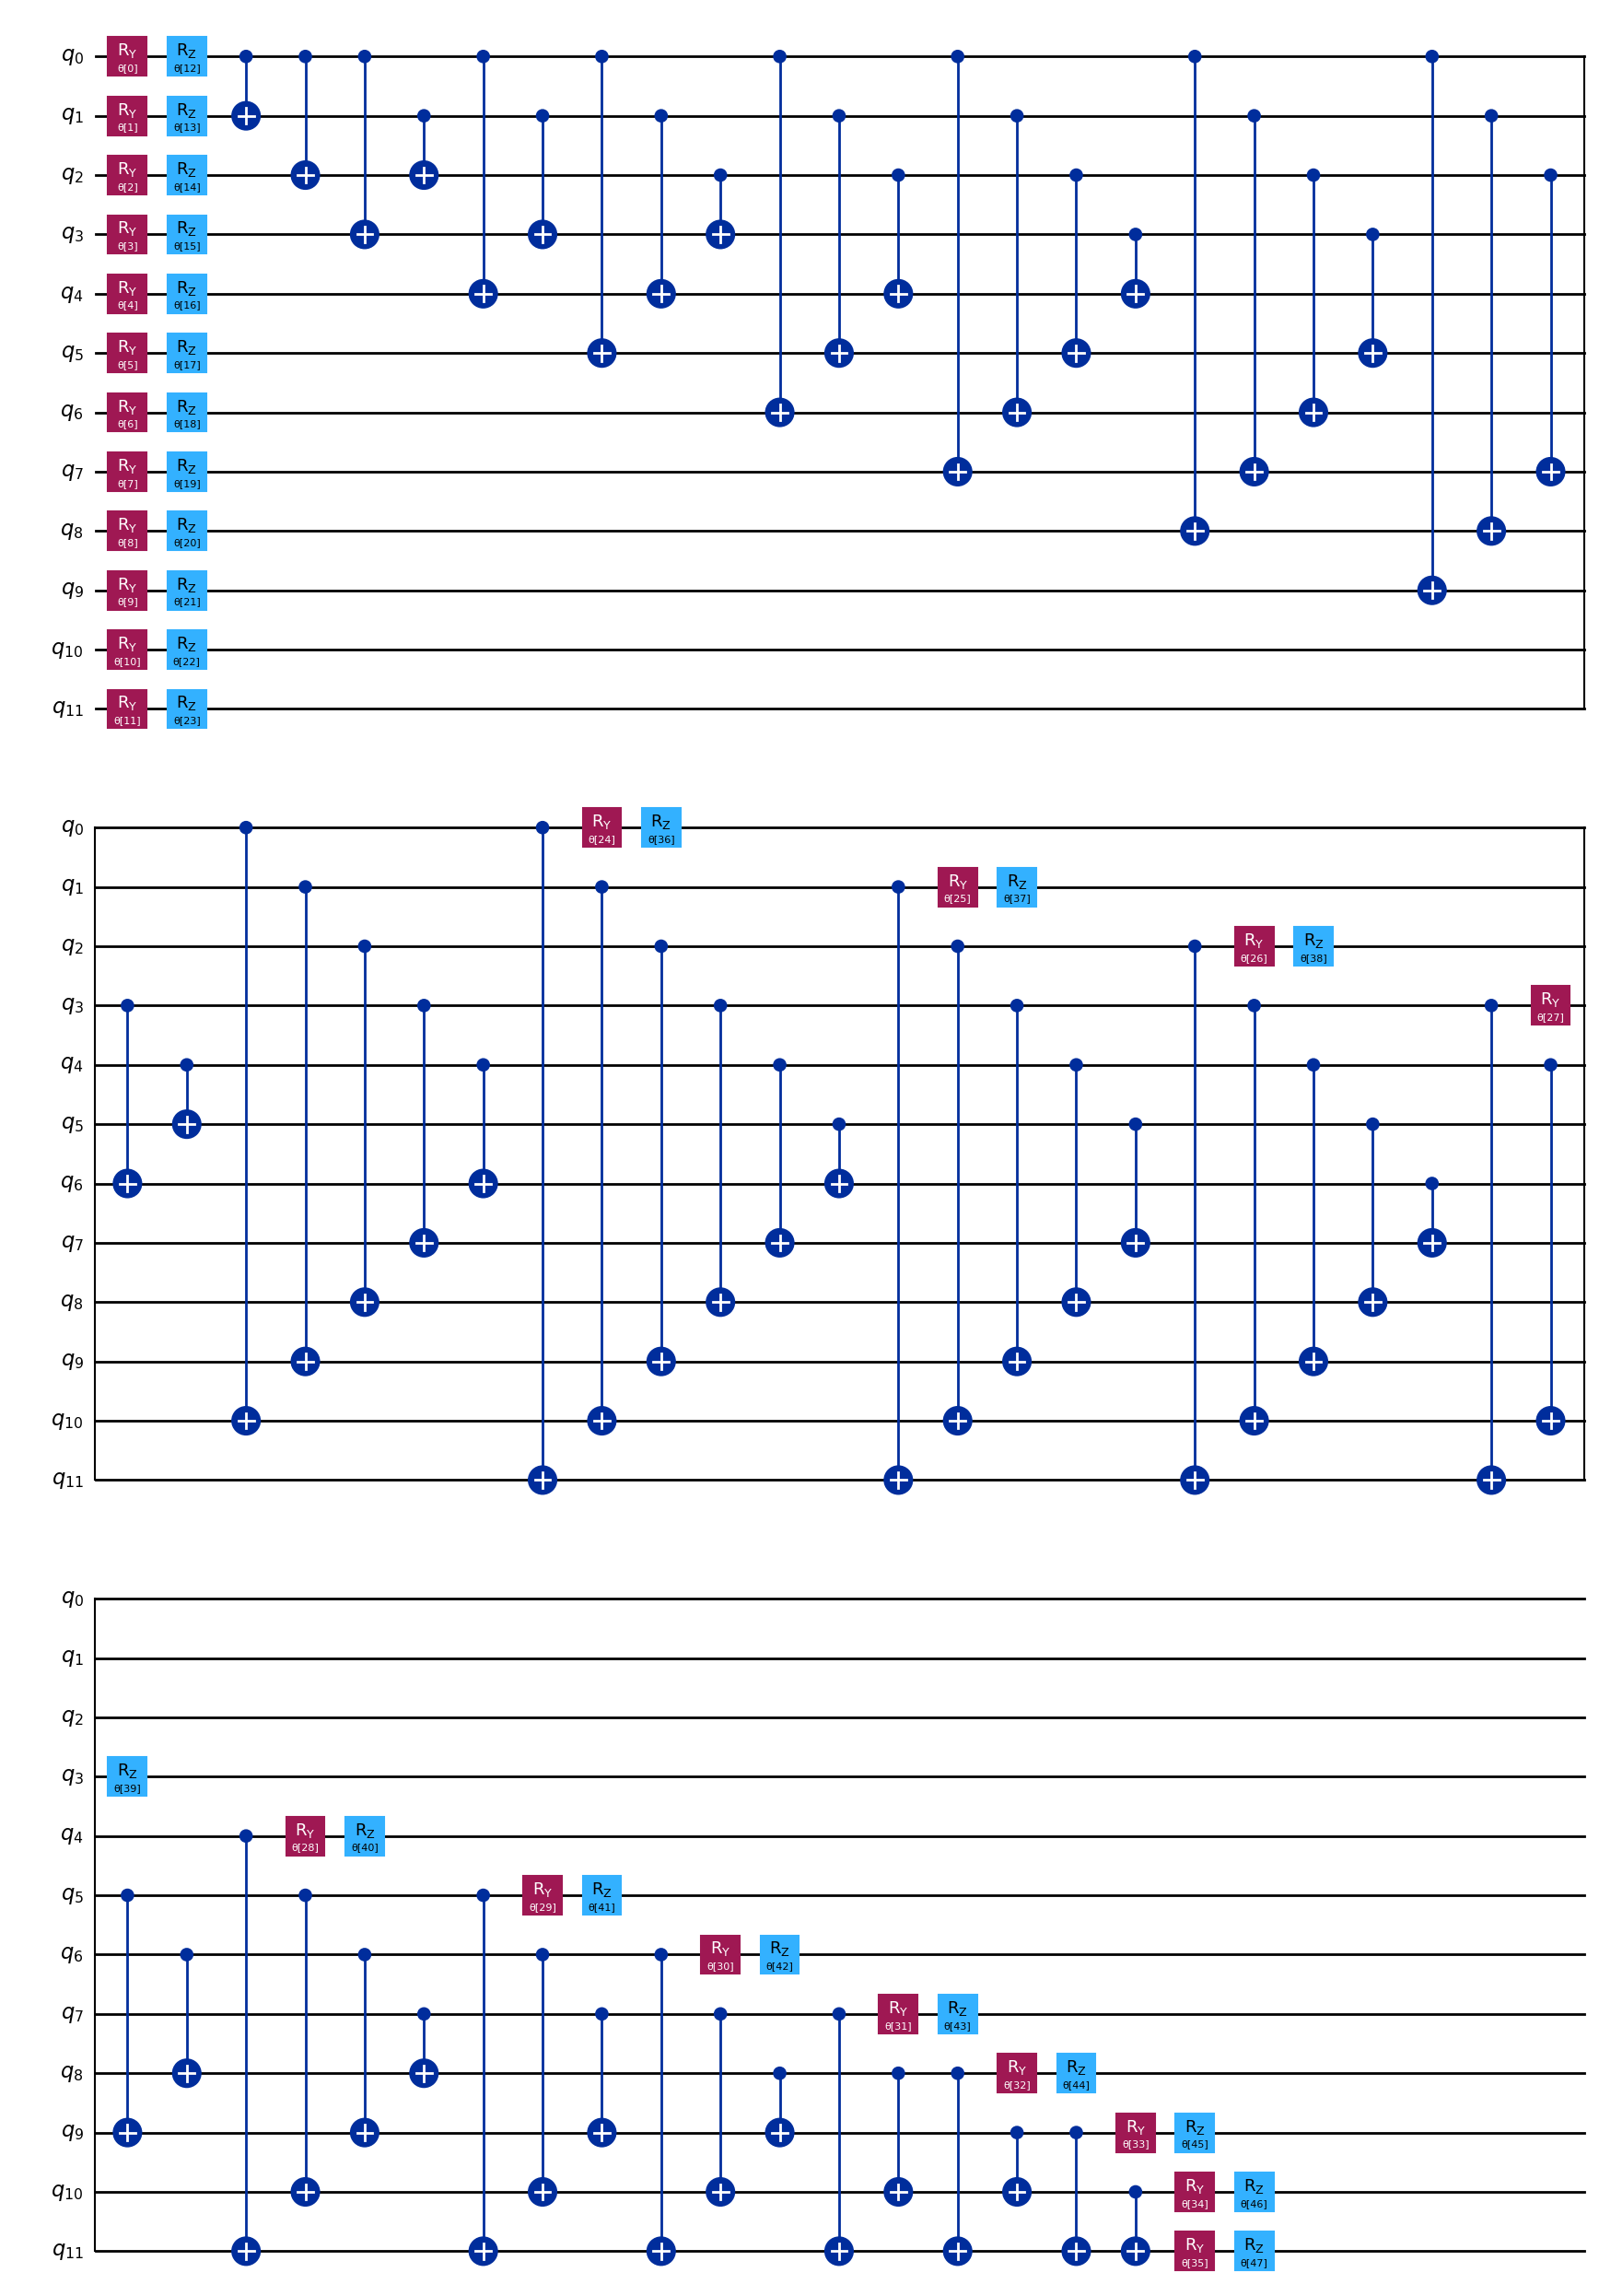

In [49]:
# The ansatz with efficient_su2

efficient_su2_qnn_circuit = efficient_su2(num_qubits=num_qubits, reps=1, entanglement="full")

# Draw the circuit
efficient_su2_qnn_circuit.draw("mpl")

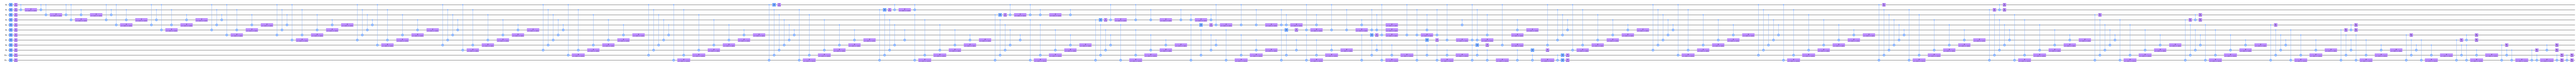

In [50]:
# QNN ansatz
ansatz = qnn_circuit
#ansatz = efficient_su2_qnn_circuit


# Combine the feature map with the ansatz
full_circuit = QuantumCircuit(num_qubits)
full_circuit.compose(feature_map, range(num_qubits), inplace=True)
full_circuit.compose(ansatz, range(num_qubits), inplace=True)

# Display the circuit
full_circuit.draw("mpl", style="clifford", fold=-1)

We must now define an observable, so we can use it in our cost function. We will obtain an expectation value for this observable using Estimator. If we have selected a good, problem-motivated ansatz, then each qubit will contain information relevant to classification.  There is nothing unique about choosing $Z$, but it is well motivated:

*   This is a binary classification task, and a measurement of $Z$ can yield two possible outcomes.
*   The eigenvalues of $Z$ ($\pm 1$) are reasonably well separated, and result in an estimator outcome in interval \[-1, +1], where 0 can simply be used as a cutoff value.
*   It is straightforward to measure in Pauli Z basis with no extra gate overhead.

So, Z is a very natural choice.

In [51]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp.from_list([("Z" * (num_qubits), 1)])

We have our quantum circuit and the observable we want to estimate. Now we need a few things in order to run and optimize this circuit. First, we need a function to run a forward pass. Note that the function below takes in the `input_params` and `weight_params` separately. The former is the set of static parameters describing the data in an image, and the latter is the set of variable parameters to be optimized.

In [53]:
from qiskit.primitives import BaseEstimatorV2
from qiskit.quantum_info.operators.base_operator import BaseOperator


def forward(
    circuit: QuantumCircuit,
    input_params: np.ndarray,
    weight_params: np.ndarray,
    estimator: BaseEstimatorV2,
    observable: BaseOperator,
) -> np.ndarray:
    """
    Forward pass of the neural network.

    Args:
        circuit: circuit consisting of data loader gates and the neural network ansatz.
        input_params: data encoding parameters.
        weight_params: neural network ansatz parameters.
        estimator: EstimatorV2 primitive.
        observable: a single observable to compute the expectation over.

    Returns:
        expectation_values: an array (for one observable) or a matrix (for a sequence of observables) of expectation values.
        Rows correspond to observables and columns to data samples.
    """
    num_samples = input_params.shape[0]
    weights = np.broadcast_to(weight_params, (num_samples, len(weight_params)))
    params = np.concatenate((input_params, weights), axis=1)
    pub = (circuit, observable, params)
    job = estimator.run([pub])
    result = job.result()[0]
    expectation_values = result.data.evs

    return expectation_values

### Loss function

Next, we need a loss function to calculate the difference between the predicted and calculated values of the labels. The function will take in the labels predicted by the algorithm and the correct labels and return the mean squared difference. There any many different loss functions. Here, MSE is an example that we chose.

In [54]:
def mse_loss(predict: np.ndarray, target: np.ndarray) -> np.ndarray:
    """
    Mean squared error (MSE).

    prediction: predictions from the forward pass of neural network.
    target: true labels.

    output: MSE loss.
    """
    if len(predict.shape) <= 1:
        return ((predict - target) ** 2).mean()
    else:
        raise AssertionError("input should be 1d-array")

Let us also define a slightly different loss function that is a function of the variable parameters (weights), for use by the classical optimizer. This function only takes the ansatz parameters as input; other variables for the forward pass and the loss are set as global parameters. The optimizer will train the model by sampling different weights and attempting to lower the output of the cost/loss function.

In [55]:
def mse_loss_weights(weight_params: np.ndarray) -> np.ndarray:
    """
    Cost function for the optimizer to update the ansatz parameters.

    weight_params: ansatz parameters to be updated by the optimizer.

    output: MSE loss.
    """
    predictions = forward(
        circuit=circuit,
        input_params=input_params,
        weight_params=weight_params,
        estimator=estimator,
        observable=observable,
    )

    cost = mse_loss(predict=predictions, target=target)
    objective_func_vals.append(cost)

    global iter
    if iter % 50 == 0:
        print(f"Iter: {iter}, loss: {cost}")
    iter += 1

    return cost

### Loop over the dataset in batches and epochs

We first implement the full algorithm using a simulator for cursory debugging and for estimates of error. We can now go over the entire dataset in batches in desired number of epochs to train our quantum neural network.

In [56]:
from qiskit.primitives import StatevectorEstimator as Estimator
from scipy.optimize import minimize

batch_size = 64
num_epochs = 1
num_samples = len(X_train)

# Globals
circuit = full_circuit
estimator = Estimator()  # simulator for debugging
observables = observable
objective_func_vals = []
iter = 0

# Random initial weights for the ansatz
np.random.seed(42)
weight_params = np.random.rand(len(ansatz.parameters)) * 2 * np.pi

for epoch in range(num_epochs):
    for i in range((num_samples - 1) // batch_size + 1):
        print(f"Epoch: {epoch}, batch: {i}")
        start_i = i * batch_size
        end_i = start_i + batch_size
        X_train_batch = np.array(X_train[start_i:end_i])
        train_labels_batch = np.array(train_labels[start_i:end_i])
        input_params = X_train_batch
        target = train_labels_batch
        iter = 0
        res = minimize(
            mse_loss_weights, weight_params, method = "COBYLA", options={"maxiter": 200} # "maxiter": 200
        )
        weight_params = res["x"]

Epoch: 0, batch: 0
Iter: 0, loss: 0.9930082915048244
Iter: 50, loss: 0.9837802725764031
Iter: 100, loss: 0.9742055613484291
Iter: 150, loss: 0.9715028036010714


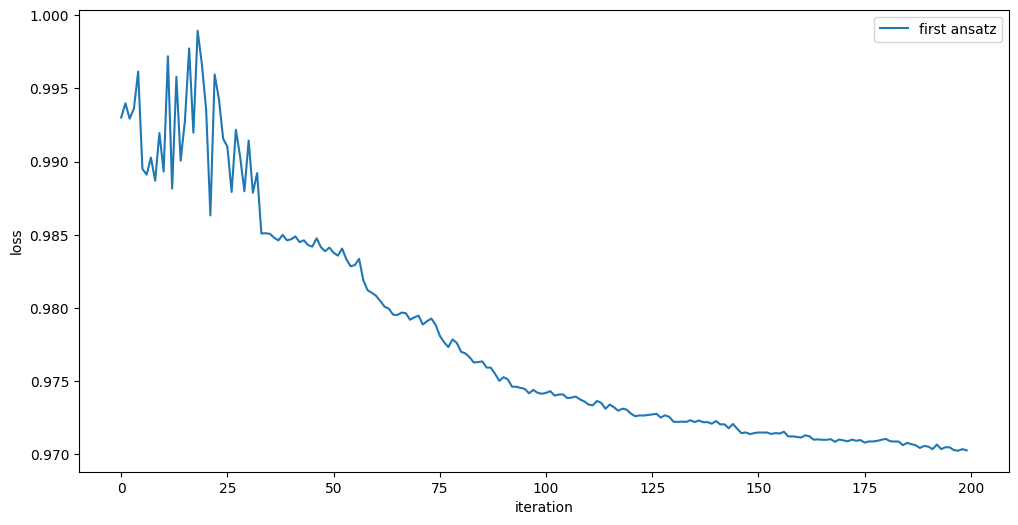

In [57]:
obj_func_vals_first = objective_func_vals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(obj_func_vals_first, label="first ansatz")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()
plt.show()

### Testing and accuracy

We now interpret the results from training. We first test the training accuracy over the training set.

In [58]:
import copy
from sklearn.metrics import accuracy_score
from qiskit.primitives import StatevectorEstimator as Estimator  # simulator
# from qiskit_ibm_runtime import EstimatorV2 as Estimator  # real quantum computer

estimator = Estimator()
# estimator = Estimator(backend=backend)

pred_train = forward(circuit, np.array(X_train), res["x"], estimator, observable)
# pred_train = forward(circuit_ibm, np.array(train_images), res['x'], estimator, observable_ibm)

print(pred_train)

pred_train_labels = copy.deepcopy(pred_train)
pred_train_labels[pred_train_labels >= 0] = 1
pred_train_labels[pred_train_labels < 0] = -1
print(pred_train_labels)
print(train_labels)

accuracy = accuracy_score(train_labels, pred_train_labels)
print(f"Train accuracy: {accuracy * 100}%")

[ 0.00566755  0.01302079  0.02310262  0.02329695 -0.00526768  0.0113287
 -0.01588193  0.01521961 -0.02862997 -0.00569355 -0.02953787 -0.01798178
 -0.00163153  0.01347009 -0.01454869 -0.02167945 -0.01352522 -0.01165868
 -0.05687822 -0.01701173 -0.02017245  0.0094794  -0.0117322  -0.0150557
 -0.01057064 -0.01382341 -0.00379866 -0.00676941 -0.00828463 -0.00402398
  0.01708071 -0.01559676 -0.04900524 -0.00216809 -0.01492048 -0.00812418
 -0.0250533  -0.00013971  0.02471716 -0.00355412  0.00328721  0.02867822
 -0.06014808 -0.00430841  0.03566649  0.03631077 -0.05341679 -0.01785346
 -0.00173419  0.00379531 -0.02031974  0.00784655 -0.00673912 -0.00994021
  0.01435071 -0.01618219  0.00876682]
[ 1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.
  1. -1.  1.]
[-1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 

and the accuracy on the test set is

In [59]:
pred_test = forward(circuit, np.array(X_test), res["x"], estimator, observable)


print(pred_test)

pred_test_labels = copy.deepcopy(pred_test)
pred_test_labels[pred_test_labels >= 0] = 1
pred_test_labels[pred_test_labels < 0] = -1
print(pred_test_labels)
print(test_labels)

accuracy = accuracy_score(test_labels, pred_test_labels)
print(f"Test accuracy: {accuracy * 100}%")

[-0.01709082  0.00591794  0.01857211 -0.01174755  0.00159785 -0.00124285
 -0.00797295 -0.01839982 -0.03346782  0.01408967 -0.00554348  0.01488392
  0.01901289  0.02920665 -0.02096749]
[-1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1.]
[-1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1]
Test accuracy: 60.0%


In [ ]:
# Train accuracy and Test accuracy

# for feature_map = zz_feature_map(num_qubits, reps=2,parameter_prefix="x")
# and qnn_circuit, but not with efficient_su2 we obtain:
# Train accuracy: 85.96491228070175% , Test accuracy: 60.0%


# for feature_map = pauli_feature_map(num_qubits, reps=1, parameter_prefix="x", paulis=["Z", "YY"], entanglement="full")
# and qnn_circuit, but not with efficient_su2 we obtain:
# Train accuracy: 73.68421052631578% , Test accuracy: 33.33333333333333%




The notebook is based on materials from various sources including  [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning/en/courses/quantum-machine-learning). However, it has been significantly modified. The syntax is according to qiskit version 2.3.

Please cite/acknowledge my work when you use this notebook. Thanks. M. Faryad. [github/muf18](github.com/muf148)

In [60]:
#!uv pip install qiskit==1.4.4 qiskit_machine_learning==0.8.4
#!pip install qiskit==1.4.4 qiskit_machine_learning==0.8.4

In [61]:
# I am waiting more than 2h for the graph and I stopped the training
"""
from qiskit_machine_learning.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()


from matplotlib import pyplot as plt
#from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")



train_score_q4 = vqc.score(X_train, train_labels)
test_score_q4 = vqc.score(X_test, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")
"""

'\nfrom qiskit_machine_learning.optimizers import COBYLA\n\noptimizer = COBYLA(maxiter=100)\n\nfrom qiskit.primitives import StatevectorSampler as Sampler\n\nsampler = Sampler()\n\n\nfrom matplotlib import pyplot as plt\n#from IPython.display import clear_output\n\nobjective_func_vals = []\nplt.rcParams["figure.figsize"] = (12, 6)\n\n\ndef callback_graph(weights, obj_func_eval):\n    clear_output(wait=True)\n    objective_func_vals.append(obj_func_eval)\n    plt.title("Objective function value against iteration")\n    plt.xlabel("Iteration")\n    plt.ylabel("Objective function value")\n    plt.plot(range(len(objective_func_vals)), objective_func_vals)\n    plt.show()\n\n\nimport time\nfrom qiskit_machine_learning.algorithms.classifiers import VQC\n\nvqc = VQC(\n    sampler=sampler,\n    feature_map=feature_map,\n    ansatz=ansatz,\n    optimizer=optimizer,\n    callback=callback_graph,\n)\n\n# clear objective value history\nobjective_func_vals = []\n\nstart = time.time()\nvqc.fit(X_tra

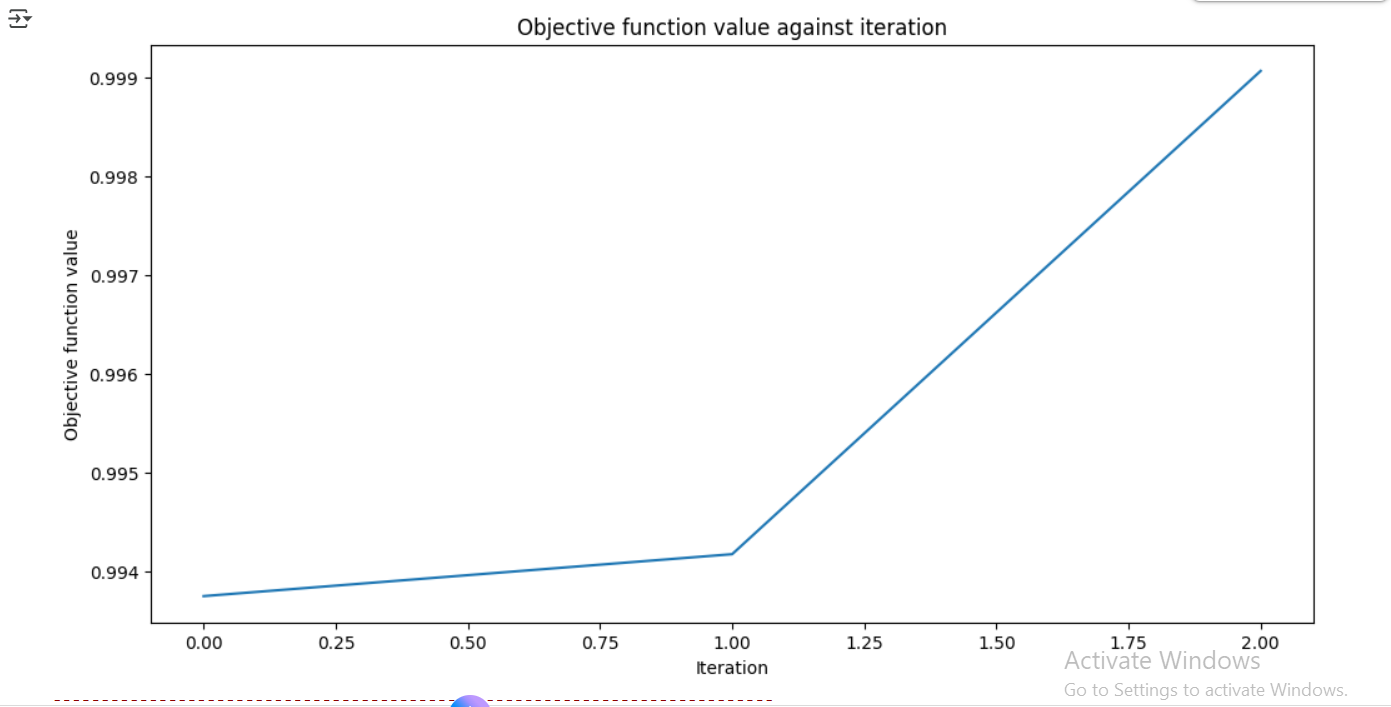

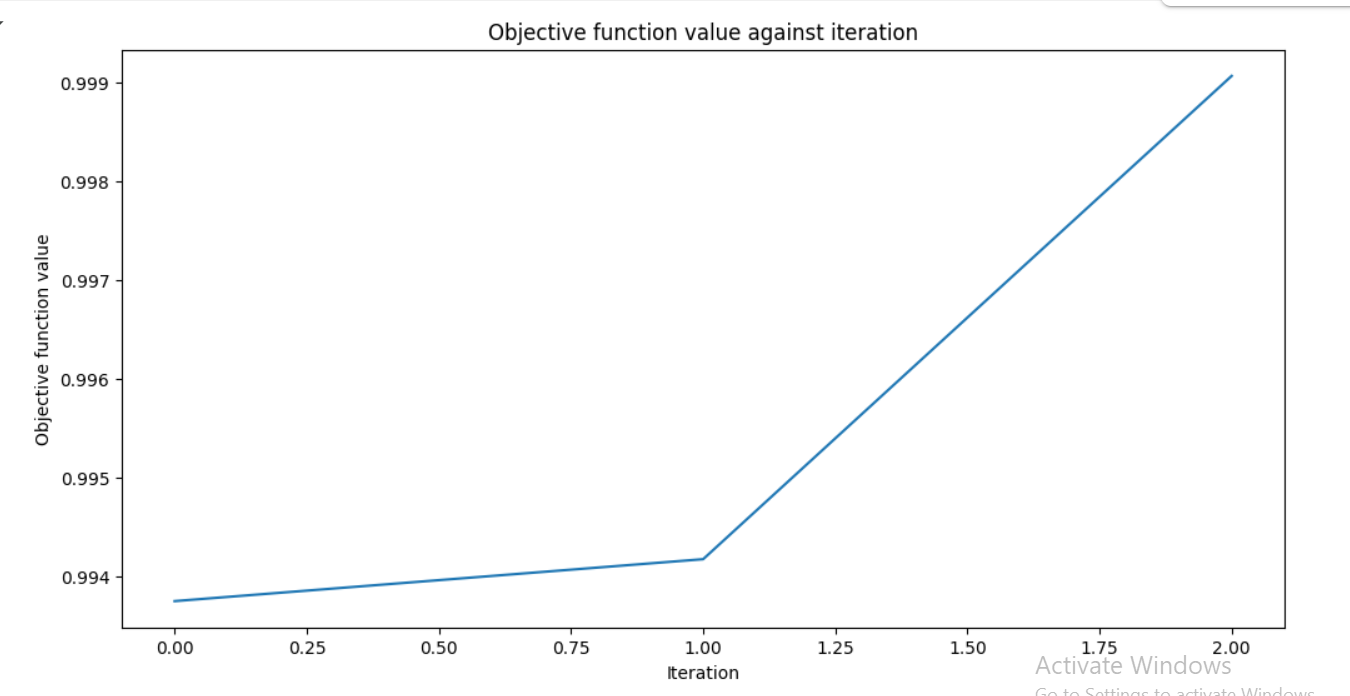

### Qs. 3. Experiment with different feature encodings for the Leukemia data with 20 features and implement the QSVM. Aim to get a training and test accuracy of more than 85%. [10 points]

### QML 4b. QSVM for Leukemia Data
Quantum vs Classical SVM for Leukemia data of 72 patients

This dataset comes from the classic Golub et al. (1999) paper, where microarray gene expression data was used to distinguish Acute Myeloid Leukemia (AML) from Acute Lymphoblastic Leukemia (ALL).

Samples (n ≈ 72): Each column corresponds to one patient’s leukemia sample. There are 47 ALL samples and 25 AML samples. Each row corresponds to a gene (a probe on the microarray). The cell values are gene expression levels (typically log-transformed intensities). The data set can be downloaded from [this link](http://hastie.su.domains/CASI_files/DATA/leukemia_small.csv)


If you are running this notebook in VS code, your environment must have the following libraries installed. If you are running this in google colab, you need to install the following libraries each time you initialize colab session.

`qiskit, qiskit-aer, qiskit-ibm-runtime, matplotlib, pylatexenc, pandas, scikit-learn`

### Step 1. Data import and preprocessing
Import the data and read a desired number of features, instead of all the features.

In [62]:
import pandas as pd
import numpy as np

# Load the CSV file
df_raw = pd.read_csv('leukemia_small.csv', header=None)

# Extract labels from the first row
labels = df_raw.iloc[0, :].values

# Extract data from rows 2 to 21 (index 1 to 20)
#X = df_raw.iloc[1:11, :].astype(float).values
# The 20 features of the Leukemia data
X = df_raw.iloc[1:21, :].astype(float).values
X = X.T
# Convert labels: ALL -> -1, AML -> 1
y = np.where(labels == 'ALL', -1, 1)
print('X.shape = ', X.shape, ', y.shape = ',y.shape)

X.shape =  (72, 20) , y.shape =  (72,)


<Axes: >

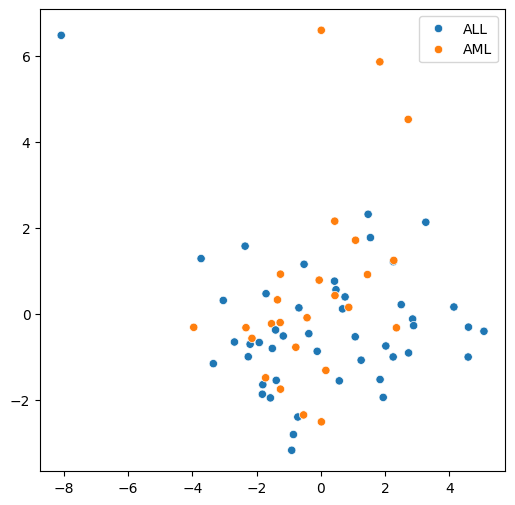

In [63]:
# We use the 20 features of the Leukemia data and after I apply PCA for dimensionality reduction
# We reduce the features at 8 components (or at 12 components or at x components) using PCA

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

X = PCA(n_components=8).fit_transform(X)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="tab10")

In [64]:
# Rescale X to be within -pi to pi
X_min = np.min(X)
X_max = np.max(X)
X_rescaled = (X - X_min) / (X_max - X_min) * 2*(np.pi)
X = X_rescaled

### Step 2. Split data into test and training set

In [65]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('X_train.shape = ', X_train.shape, ', X_test.shape = ', X_test.shape)

X_train.shape =  (57, 8) , X_test.shape =  (15, 8)


### Step 3. Feature Map
Design an appropriate kernel circuit containing two parts. One part has trainable weights and the other part has feature encoding. We will use a custom feature map.

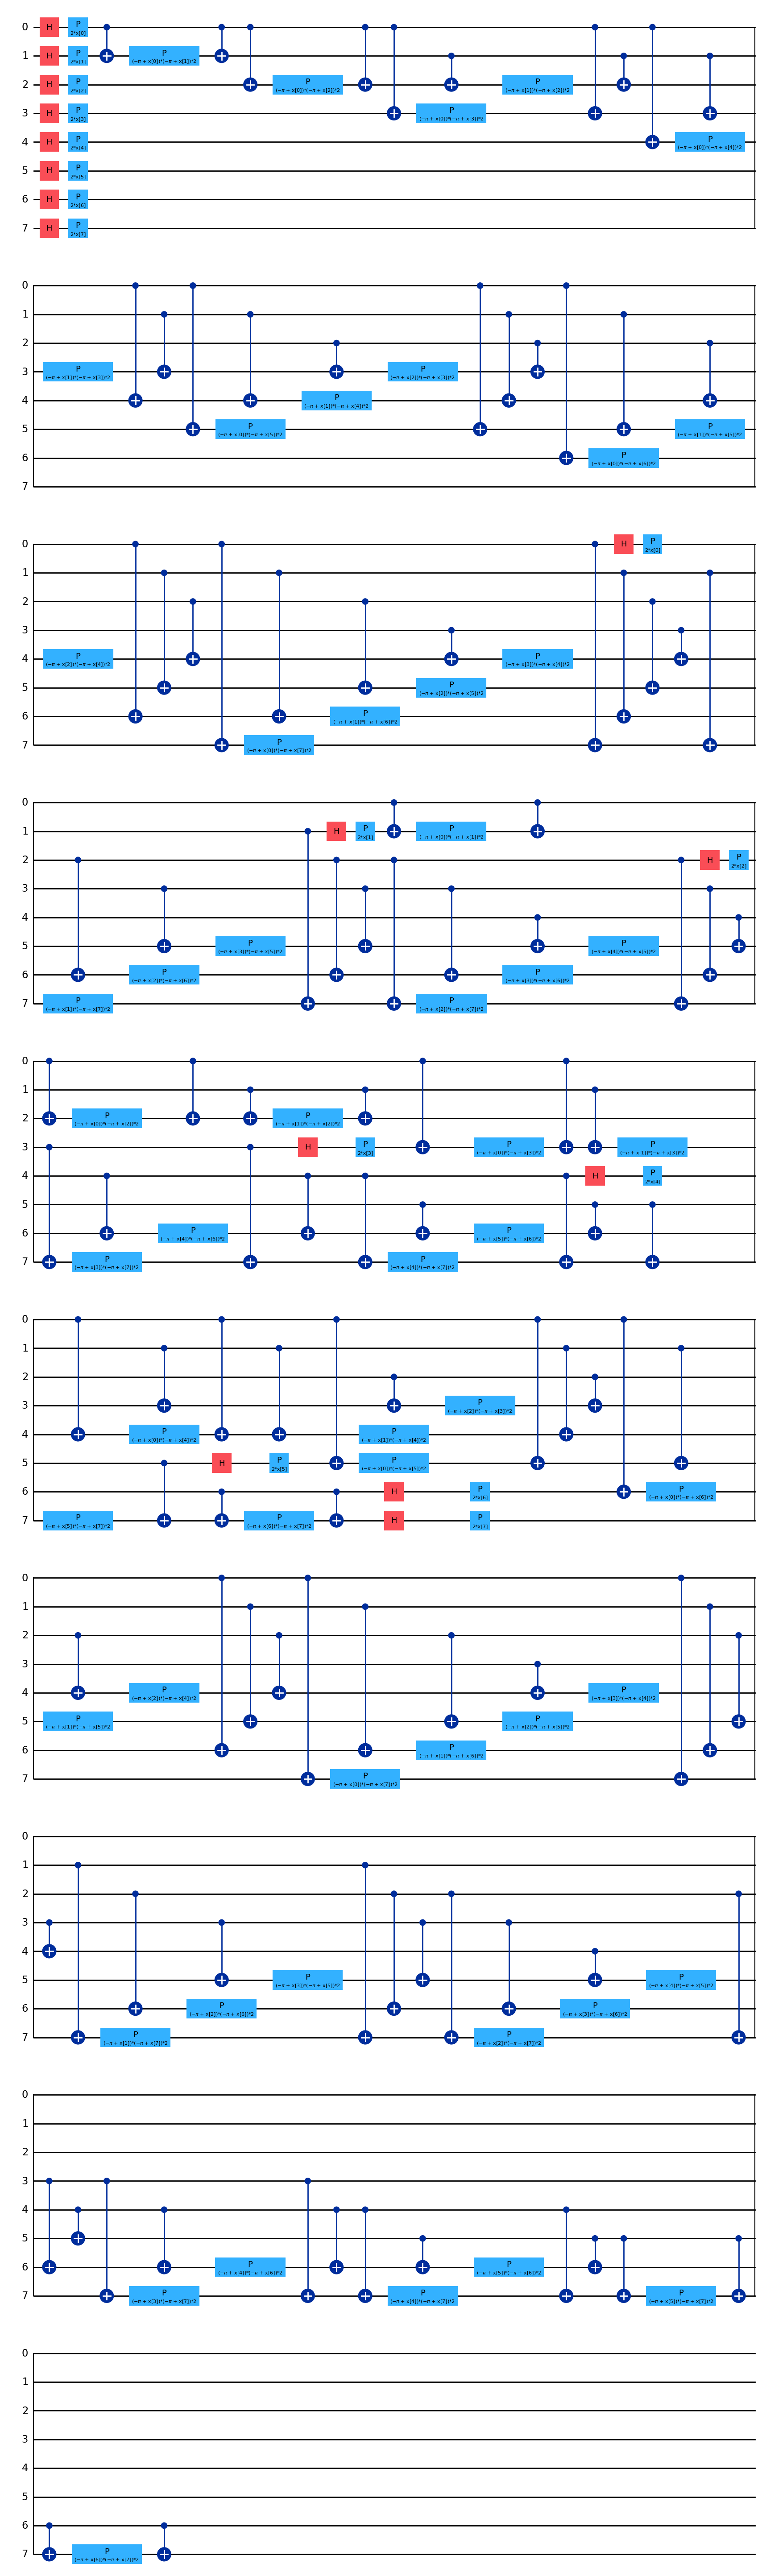

In [66]:
from qiskit.circuit.library import zz_feature_map
from qiskit.circuit.library import efficient_su2, n_local, pauli_feature_map
num_features = np.shape(X_train)[1]
num_qubits = int(num_features)
# Data encoding
# Note that qiskit orders parameters alphabetically. We assign the parameter prefix "a" to ensure our data encoding goes to the first part of the circuit, the feature mapping.
#fm = zz_feature_map(num_qubits, reps=2,parameter_prefix="x")
fm = pauli_feature_map(num_qubits, reps=2, parameter_prefix="x")

#circuit = n_local(num_qubits, "ry", "cz", reps=2).decompose()
#fm.append(circuit, list(range(fm.num_qubits)))

fm.draw("mpl")

### Step 4. Kernel and Test matrices
We do not need to optimize for the simulator and we directly run the loop over the whole dataset to compute all kernel etnries 1. For training matrix, we compute inner product between each of the example with every other example, and just put 1 for the inner product with itself. 2. For test matrix, we compute the inner product of every example in the test set with every example in the training set.

In [67]:
# Empty kernel matrix
test_size = np.shape(X_test)[0]
train_size = np.shape(X_train)[0]
num_samples = np.shape(X_train)[0]
kernel_matrix = np.full((num_samples, num_samples), np.nan)
test_matrix = np.full((test_size, num_samples), np.nan)

In [68]:
# To use a simulator
from qiskit.primitives import StatevectorSampler
from qiskit.circuit.library import unitary_overlap

num_shots = 10000

sampler = StatevectorSampler()

for x1 in range(0, train_size):
    for x2 in range(x1 + 1, train_size):
        unitary1 = fm.assign_parameters(list(X_train[x1]))
        unitary2 = fm.assign_parameters(list(X_train[x2]))

        # Create the overlap circuit
        overlap_circ = unitary_overlap(unitary1, unitary2)
        overlap_circ.measure_all()

        # These lines run the qiskit sampler primitive.
        counts = (
            sampler.run([overlap_circ], shots=num_shots)
            .result()[0]
            .data.meas.get_int_counts()
        )

        # Assign the probability of the 0 state to the kernel matrix, and the transposed element (since this is an inner product)
        kernel_matrix[x1, x2] = counts.get(0, 0.0) / num_shots
        kernel_matrix[x2, x1] = counts.get(0, 0.0) / num_shots
    # Fill in on-diagonal elements with 1, again, since this is an inner-product corresponding to probability (or alter the code to check these entries and verify they yield 1)
    kernel_matrix[x1, x1] = 1

print("training done")

# Similar process to above, but for testing data.
for x1 in range(0, test_size):
    for x2 in range(0, train_size):
        unitary1 = fm.assign_parameters(list(X_test[x1]))
        unitary2 = fm.assign_parameters(list(X_train[x2]))

        # Create the overlap circuit
        overlap_circ = unitary_overlap(unitary1, unitary2)
        overlap_circ.measure_all()

        counts = (
            sampler.run([overlap_circ], shots=num_shots)
            .result()[0]
            .data.meas.get_int_counts()
        )

        test_matrix[x1, x2] = counts.get(0, 0.0) / num_shots

print("test matrix done")

training done
test matrix done


Let us just visualize the kernel and test matrices

Text(0.5, 1.0, 'test matrix')

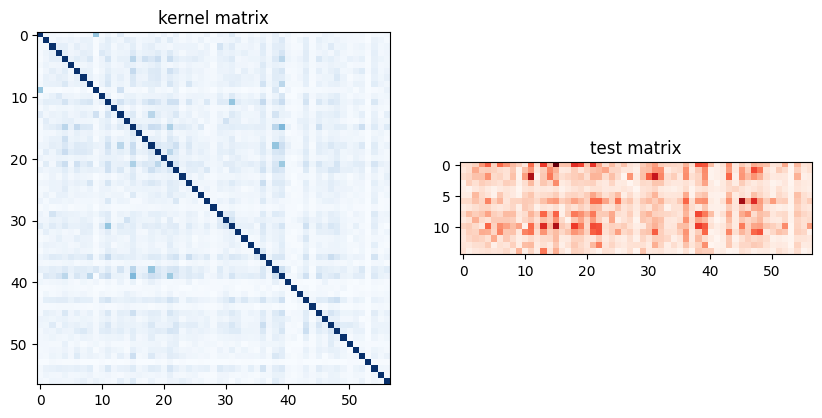

In [71]:
# Visualisation Imports
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(kernel_matrix), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("kernel matrix")

axs[1].imshow(np.asmatrix(test_matrix), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("test matrix")

### Step 3. Quantum SVM
We can now use the kernel matrix in the support vector machine class in sklearn and train it to build the statevector classifier SVC

In [72]:
# import a support vector classifier from a classical ML package.
from sklearn.svm import SVC

# Specify that you want to use a pre-computed kernel matrix
qml_svc = SVC(kernel="precomputed")

# Feed in the pre-computed matrix and the labels of the training data. The classical algorithm gives you a fit.
qml_svc.fit(kernel_matrix, train_labels)

# Now use the .score to test your data, using the matrix of test data, and test labels as your inputs.
qml_score_train_kernel = qml_svc.score(kernel_matrix, train_labels)
print(f"Quantum SVC classification training accuracy: {qml_score_train_kernel}")
qml_score_test_kernel = qml_svc.score(test_matrix, test_labels)
print(f"Quantum SVC classification test accuracy: {qml_score_test_kernel}")

Quantum SVC classification training accuracy: 1.0
Quantum SVC classification test accuracy: 0.6666666666666666


### Step 6. Classical SVM for comparison
To compare with classical SVM, let use the same dataset for a classical SVM.

In [73]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(X_train, train_labels)  # suppress printing the return value
train_score_c = svc.score(X_train, train_labels)
test_score_c = svc.score(X_test, test_labels)


print(f"Classical SVC training accuracy: {train_score_c:.2f}")
print(f"Classical SVC test accuracy:     {test_score_c:.2f}")

Classical SVC training accuracy: 0.74
Classical SVC test accuracy:     0.67


The notebook is based on materials from various sources including  [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning/en/courses/quantum-machine-learning). However, it has been significantly modified. The syntax is according to qiskit version 2.3.

Please cite/acknowledge my work when you use this notebook. Thanks. M. Faryad. [github/muf18](github.com/muf148)

### QSVM with pennylane

In [ ]:
#!uv pip install pennylane
!pip install pennylane

Using Python 3.12.12 environment at: /usr
Audited 1 package in 100ms


In [82]:
from sklearn.metrics import accuracy_score
import pennylane as qml
from itertools import combinations

def ZZFeatureMap(nqubits, data):
    nload = min(len(data), nqubits)
    for i in range(nload):
        qml.Hadamard(i)
        qml.RZ(2.0 * data[i], wires=i)
    for pair in list(combinations(range(nload), 2)):
        q0 = pair[0]
        q1 = pair[1]
        qml.CZ(wires=[q0, q1])
        qml.RZ(2.0 * (np.pi - data[q0]) * (np.pi - data[q1]), wires=q1)
        qml.CZ(wires=[q0, q1])

nqubits = num_qubits
dev = qml.device("lightning.qubit", wires=nqubits)

@qml.qnode(dev)
def kernel_circ(a, b):
    ZZFeatureMap(nqubits, a)
    qml.adjoint(ZZFeatureMap)(nqubits, b)
    return qml.probs(wires=range(nqubits))

from sklearn.svm import SVC
def qkernel(A, B):
    return np.array([[kernel_circ(a, b)[0] for b in B] for a in A])

svm = SVC(kernel=qkernel).fit(X_train, train_labels)

print(accuracy_score(svm.predict(X_test), test_labels))

test_score_qp = accuracy_score(svm.predict(X_test), test_labels)
train_score_qp = accuracy_score(svm.predict(X_train), train_labels)

print(f"Classical SVC training accuracy: {train_score_qp:.2f}")
print(f"Classical SVC test accuracy:     {test_score_qp:.2f}")


0.6666666666666666
Classical SVC training accuracy: 0.93
Classical SVC test accuracy:     0.67


In [83]:
nqubits = num_qubits
dev = qml.device("lightning.qubit", wires=nqubits)

@qml.qnode(dev)
def kernel_circ(a, b):
    qml.AngleEmbedding(a, wires=range(nqubits))
    qml.adjoint(qml.AngleEmbedding(b, wires=range(nqubits)))
    return qml.probs(wires=range(nqubits))

from sklearn.svm import SVC
def qkernel(A, B):
    return np.array([[kernel_circ(a, b)[0] for b in B] for a in A])

svm = SVC(kernel=qkernel).fit(X_train, train_labels)

print(accuracy_score(svm.predict(X_test), test_labels))

test_score_qp = accuracy_score(svm.predict(X_test), test_labels)
train_score_qp = accuracy_score(svm.predict(X_train), train_labels)

print(f"Classical SVC training accuracy: {train_score_qp:.2f}")
print(f"Classical SVC test accuracy:     {test_score_qp:.2f}")



0.6666666666666666
Classical SVC training accuracy: 0.70
Classical SVC test accuracy:     0.67


In [84]:
from pennylane.templates import AngleEmbedding

n_qubits = num_qubits
dev_kernel = qml.device("lightning.qubit", wires=n_qubits)

projector = np.zeros((2 ** n_qubits, 2 ** n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])


svm = SVC(kernel=kernel_matrix).fit(X_train, train_labels)

print(accuracy_score(svm.predict(X_test), test_labels))

test_score_qp = accuracy_score(svm.predict(X_test), test_labels)
train_score_qp = accuracy_score(svm.predict(X_train), train_labels)

print(f"Classical SVC training accuracy: {train_score_qp:.2f}")
print(f"Classical SVC test accuracy:     {test_score_qp:.2f}")



0.6666666666666666
Classical SVC training accuracy: 0.70
Classical SVC test accuracy:     0.67


In [85]:
from sklearn.metrics import accuracy_score
import pennylane as qml

nqubits = num_qubits
dev = qml.device("lightning.qubit", wires=nqubits)

@qml.qnode(dev)
def kernel_circ(a, b):
    qml.AmplitudeEmbedding(
        a, wires=range(nqubits), pad_with=0, normalize=True)
    qml.adjoint(qml.AmplitudeEmbedding(
        b, wires=range(nqubits), pad_with=0, normalize=True))
    return qml.probs(wires=range(nqubits))

from sklearn.svm import SVC
def qkernel(A, B):
    return np.array([[kernel_circ(a, b)[0] for b in B] for a in A])

svm = SVC(kernel=qkernel).fit(X_train, train_labels)

print(accuracy_score(svm.predict(X_test), test_labels))

test_score_qp = accuracy_score(svm.predict(X_test), test_labels)
train_score_qp = accuracy_score(svm.predict(X_train), train_labels)

print(f"Classical SVC training accuracy: {train_score_qp:.2f}")
print(f"Classical SVC test accuracy:     {test_score_qp:.2f}")


0.6666666666666666
Classical SVC training accuracy: 0.65
Classical SVC test accuracy:     0.67
